# Code used for simulations and obtaining graphs in the article "..."

# This notebook:
### 1. Reads in the SBML model 
### 2. Predicts growth rate on different carbon sources, with and without added transporters, for Table 2 in section 3.1
### 3. Performes sensitivity analysis in section 3.1
### 4. Constrains model with experimental data from Supplementary file 2 and optimizes from growth. Bar plot in section 3.3 is subsequently created

### Import

In [3]:
import cobra
from cobra import Reaction
import numpy as np
import matplotlib.pyplot as plt

### Read in SBML model

In [5]:
model = cobra.io.read_sbml_model('') # Add path to model here

### Predicted growth rates on different carbon sources

In [9]:
# Names of carbon sources tested
name_list = ['glucose', 'galactose', 'sucrose', 'lactose', 'raffinose', 'maltose', 'fructose', 'mannose', 'ribulose', 'xylose', 'pyruvate', 'acetate', 'formate', 'starch', 'xylan', 'laminarin', 'alginate', 'cellulose', 'malate', 'fumarate', 'succinate', 'citrate', 'ornithin', 'oxaloacetate', '2-oxoglutarate', 'glutamate', 'aspartate', 'glutamine', 'asparagine', 'arginine', 'leucine', 'phenylalanine', 'proline', 'serine', 'threonine', 'valine', 'alanine', 'histine', 'glycine', 'lysine', 'tryptophan', 'tyrosine', 'cysteine', 'methionine', 'isoleucine']

# IDs of exchange reactions
ex_carbon_list = ['EX_glc_e', 'EX_gal_e', 'EX_sucr_e', 'EX_lcts_e', 'EX_raffin_e', 'EX_malt_e', 'EX_fru_e', 'EX_man_e', 'EX_rbl_e', 'EX_xyl__D_e', 'EX_pyr_e', 'EX_ac_e', 'EX_for_e', 'EX_starch1200_e', 'EX_xylan12_e', 'EX_lmn20_e', 'EX_alginate50_e', 'EX_cell500_e', 'EX_mal_e', 'EX_fum_e', 'EX_succ_e', 'EX_cit_e', 'EX_orn_e', 'EX_oaa_e', 'EX_akg_e', 'EX_glu_e', 'EX_asp_e', 'EX_gln_e', 'EX_asn_e', 'EX_arg_e', 'EX_leu_e', 'EX_phe_e', 'EX_pro_e', 'EX_ser_e', 'EX_thr_e', 'EX_val_e', 'EX_ala_e', 'EX_his_e', 'EX_gly_e', 'EX_lys_e', 'EX_trp_e', 'EX_tyr_e', 'EX_cys_e', 'EX_met_e', 'EX_ile_e']

# IDs of metabolites
carbon_list = ['glc__D_c', 'gal_c', 'sucr_c', 'lcts_c', 'raffin_c', 'malt_c', 'fru_c', 'man_c', 'rbl__D_c', 'xyl__D_c', 'pyr_c', 'ac_c', 'for_c', 'starch1200_e', 'xylan12_e', 'lmn20_e', 'alginate50_e', 'cell500_e', 'mal__L_c', 'fum_c', 'succ_c', 'cit_c', 'orn_c', 'oaa_c', 'akg_c', 'glu__L_c', 'asp__L_c', 'gln__L_c', 'asn__L_c', 'arg__L_c', 'leu__L_c', 'phe__L_c', 'pro__L_c', 'ser__L_c', 'thr__L_c', 'val__L_c', 'ala__L_c', 'his__L_c', 'gly_c', 'lys__L_c', 'trp__L_c', 'tyr__L_c', 'cys__L_c', 'met__L_c', 'ile__L_c']

# Glucose uptake set to zero before starting analysis
model.reactions.EX_glc_e.lower_bound = 0

print('Metabolite\tIn Silico\tIn Silico given transport')

for x in range(len(carbon_list)): # Loop through the carbon sources
    name = name_list[x]
    with model: # if exchange reaction of metabolite is in model then allow uptake and optimize, otherwise there is no growth
        if ex_carbon_list[x] in model.reactions: 
            model.reactions.get_by_id(ex_carbon_list[x]).lower_bound = -10
            ex_metabolite = model.optimize().objective_value
        else:
            ex_metabolite = 0
    with model: # if exchange reaction of metabolite is not in model, then add it for the cytosol metabolite and optimize for growth
        if 'EX_'+carbon_list[x] not in model.reactions:
            model.add_reactions([Reaction('DM_'+carbon_list[x])])
            model.reactions.get_by_id('DM_'+carbon_list[x]).reaction = carbon_list[x]+' <=> '
            model.reactions.get_by_id('DM_'+carbon_list[x]).lower_bound = -10
        else:
            model.reactions.get_by_id('EX_'+carbon_list[x]).lower_bound = -10
        metabolite = model.optimize().objective_value
    print(name, '\t', round(ex_metabolite, 2), '\t', round(metabolite, 2))

Metabolite	In Silico	In Silico given transport
glucose 	 1.14 	 1.15
galactose 	 1.14 	 1.15
sucrose 	 2.27 	 2.31
lactose 	 2.27 	 2.31
raffinose 	 3.43 	 3.47
maltose 	 2.27 	 2.31
fructose 	 1.12 	 1.15
mannose 	 1.12 	 1.15
ribulose 	 0 	 0.96
xylose 	 0.92 	 0.96
pyruvate 	 0.45 	 0.46
acetate 	 0.31 	 0.32
formate 	 0 	 0.08
starch 	 34.76 	 34.76
xylan 	 11.46 	 11.46
laminarin 	 22.39 	 22.39
alginate 	 28.1 	 28.1
cellulose 	 32.7 	 32.7
malate 	 0 	 0.55
fumarate 	 0 	 0.55
succinate 	 0 	 0.63
citrate 	 0 	 0.8
ornithin 	 0 	 -0.0
oxaloacetate 	 0 	 0.47
2-oxoglutarate 	 0 	 0.71
glutamate 	 0.77 	 0.78
aspartate 	 0.54 	 0.56
glutamine 	 0 	 0.79
asparagine 	 0 	 0.57
arginine 	 0 	 0.0
leucine 	 0 	 0.0
phenylalanine 	 0 	 0.0
proline 	 0.88 	 0.89
serine 	 0 	 0.48
threonine 	 0 	 0.68
valine 	 0 	 -0.0
alanine 	 0.53 	 0.55
histine 	 0 	 -0.0
glycine 	 0 	 0.28
lysine 	 0 	 -0.0
tryptophan 	 0 	 0.0
tyrosine 	 0 	 0.0
cysteine 	 0 	 0.0
methionine 	 0 	 0.0
isoleucine 	 

### Sensitivity analysis

C:\Users\thordis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45 MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\thordis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:67 MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


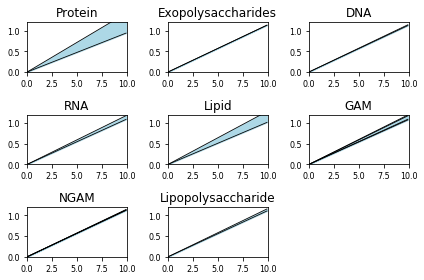

In [8]:
Metabolites_to_test = ['PROT_RMAR_c', 'EPS_RMAR_c', 'DNA_RMAR_c', 'RNA_RMAR_c', 'LIP_RMAR_c', 'glycogen_c', 'peptido_c', 'lipidAds_c']
Metabolite_names = ['Protein', 'Exopolysaccharides', 'DNA', 'RNA', 'Lipid', 'Glycogen', 'Peptidoglycan', 'Lipopolysaccharide']

for value, met in enumerate(Metabolites_to_test):
    max_list = []
    min_list = []
    coef_dif = model.reactions.BIOMASS.get_coefficient(model.metabolites.get_by_id(met)) * 0.5
    for x in np.arange(0, 10, 0.1):
        model.reactions.EX_glc_e.lower_bound = -x
        with model:
            model.reactions.BIOMASS.add_metabolites({met: coef_dif})
            max_list.append(model.optimize().objective_value)
        with model:
            model.reactions.BIOMASS.add_metabolites({met: -coef_dif})
            min_list.append(model.optimize().objective_value)
    plt.subplot(3, 3, value+1)
    plt.plot(np.arange(0, 10, 0.1), max_list, 'black', lw=0.8)
    plt.plot(np.arange(0, 10, 0.1), min_list, 'black', lw=0.8)
    plt.title(Metabolite_names[value], fontsize=12)
    plt.xlim(0, 10)
    plt.ylim(0, 1.2)
    plt.tick_params(labelsize=8)
    plt.fill_between(np.arange(0, 10, 0.1), max_list, min_list, color='lightblue')
    
# GAM and NGAM
max_list = []
min_list = []
coef_dif = model.reactions.BIOMASS.get_coefficient(model.metabolites.get_by_id('atp_c')) * 0.5
for x in np.arange(0, 10, 0.1):
    model.reactions.EX_glc_e.lower_bound = -x
    with model:
        model.reactions.BIOMASS.add_metabolites({'atp_c': coef_dif})
        model.reactions.BIOMASS.add_metabolites({'h2o_c': coef_dif})
        model.reactions.BIOMASS.add_metabolites({'adp_c': -coef_dif})
        model.reactions.BIOMASS.add_metabolites({'h_c': -coef_dif})
        model.reactions.BIOMASS.add_metabolites({'pi_c': -coef_dif})
        max_list.append(model.optimize().objective_value)
    with model:
        model.reactions.BIOMASS.add_metabolites({'atp_c': -coef_dif})
        model.reactions.BIOMASS.add_metabolites({'h2o_c': -coef_dif})
        model.reactions.BIOMASS.add_metabolites({'adp_c': coef_dif})
        model.reactions.BIOMASS.add_metabolites({'h_c': coef_dif})
        model.reactions.BIOMASS.add_metabolites({'pi_c': coef_dif})
        min_list.append(model.optimize().objective_value)
plt.subplot(3, 3, 6)
plt.plot(np.arange(0, 10, 0.1), max_list, 'black', lw=0.8)
plt.plot(np.arange(0, 10, 0.1), min_list, 'black', lw=0.8)
plt.title('GAM', fontsize=12)
plt.xlim(0, 10)
plt.ylim(0, 1.2)
plt.tick_params(labelsize=8)
plt.fill_between(np.arange(0, 10, 0.1), max_list, min_list, color='lightblue')

max_list = []
min_list = []
bound = model.reactions.ATPM.upper_bound
for x in np.arange(0, 10, 0.1):
    model.reactions.EX_glc_e.lower_bound = -x
    with model:
        model.reactions.ATPM.upper_bound = bound * 1.5
        model.reactions.ATPM.lower_bound = bound * 1.5
        max_list.append(model.optimize().objective_value)
    with model:
        model.reactions.ATPM.upper_bound = bound * 0.5
        model.reactions.ATPM.lower_bound = bound * 0.5
        min_list.append(model.optimize().objective_value)
plt.subplot(3, 3, 7)
plt.plot(np.arange(0, 10, 0.1), max_list, 'black', lw=0.8)
plt.plot(np.arange(0, 10, 0.1), min_list, 'black', lw=0.8)
plt.title('NGAM', fontsize=12)
plt.xlim(0, 10)
plt.ylim(0, 1.2)
plt.tick_params(labelsize=8)
plt.fill_between(np.arange(0, 10, 0.1), max_list, min_list, color='lightblue')
plt.tight_layout()

### Constrain model with experimental data and optimize for growth. Create bar plot

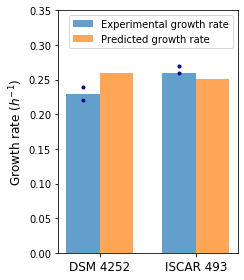

In [10]:
# Constrain model with data from DSM 4252

model.reactions.get_by_id('EX_glc_e').lower_bound = -2.44
model.reactions.get_by_id('EX_pyr_e').lower_bound = -0.47
model.reactions.get_by_id('EX_ac_e').upper_bound = 0.31
model.reactions.get_by_id('EX_lac_e').upper_bound = 0.52
model.reactions.get_by_id('EX_ac_e').lower_bound = 0.31
model.reactions.get_by_id('EX_lac_e').lower_bound = 0.52

Predicted_list = []
Predicted_list.append(model.optimize().objective_value)

# Constrain model with data from ISCAR 493

model.reactions.get_by_id('EX_glc_e').lower_bound = -2.30
model.reactions.get_by_id('EX_pyr_e').lower_bound = -0.47 # Pyruvate measurements bad - 376 value used
model.reactions.get_by_id('EX_ac_e').upper_bound = 0
model.reactions.get_by_id('EX_lac_e').upper_bound = 0.57
model.reactions.get_by_id('EX_ac_e').lower_bound = 0
model.reactions.get_by_id('EX_lac_e').lower_bound = 0.57

Predicted_list.append(model.optimize().objective_value)

# Create bar plot

Name_string = ('DSM 4252', 'ISCAR 493')

n_groups = 2

fig, ax = plt.subplots(figsize=(3.5,4))

index = np.arange(n_groups)
bar_width = 0.35


# Experimental growth rates for all replicates
Replicates = [0,0,1,1]
Experimental_Growth_Rates = [0.22, 0.24, 0.26, 0.27]
Experimental_list = [0.23, 0.26]

# Plot average experimental growth rate - light blue bars
ax.bar(index, Experimental_list, bar_width, alpha=0.7, color='tab:blue', label='Experimental growth rate')

# Plot experimental growth rates for each replicate used to determine average - dark blue dots
ax.plot(Replicates, Experimental_Growth_Rates, 'o', markersize=3, color='darkblue')

# Plot predicted growth rates, when model constrained with average experimental values
ax.bar(index + bar_width, Predicted_list, bar_width, alpha=0.7, color='tab:orange', label='Predicted growth rate')

ax.set_ylabel('Growth rate ($h^{-1}$)', fontsize=12) 

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Name_string, fontsize=12)
ax.set_ylim(0,0.35)
ax.legend()

fig.tight_layout()
plt.show()